In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from scipy import stats
import scipy

In [2]:
basics = pd.read_csv('Data/title_basics.csv.gz',low_memory = False)
akas = pd.read_csv('Data/title_akas.csv.gz',low_memory = False)
ratings = pd.read_csv('Data/title_ratings.csv.gz', low_memory = False)
year_2000 = pd.read_csv('Data/final_tmdb_data_2000.csv.gz', low_memory = False)
year_2001 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz', low_memory = False)
year_2002 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz', low_memory = False)
year_2003 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz', low_memory = False)
year_2001 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz', low_memory = False)
year_2001 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz', low_memory = False)
year_2001 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz', low_memory = False)
year_2001 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz', low_memory = False)

In [3]:
tmdb_df = pd.concat([year_2000, year_2001])
tmdb_df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.50,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.10,8.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.00,1.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.11,2162.0,PG


In [4]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2544 entries, 0 to 1314
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2544 non-null   object 
 1   adult                  2542 non-null   float64
 2   backdrop_path          1369 non-null   object 
 3   belongs_to_collection  203 non-null    object 
 4   budget                 2542 non-null   float64
 5   genres                 2542 non-null   object 
 6   homepage               171 non-null    object 
 7   id                     2542 non-null   float64
 8   original_language      2542 non-null   object 
 9   original_title         2542 non-null   object 
 10  overview               2491 non-null   object 
 11  popularity             2542 non-null   float64
 12  poster_path            2283 non-null   object 
 13  production_companies   2542 non-null   object 
 14  production_countries   2542 non-null   object 
 15  rele

In [5]:
tmdb_df = tmdb_df.dropna(subset=['certification','revenue'])

## Hypothesis Testing

- $H_0$ (Null Hypothesis): There is no significant difference between revenue and the rating of a movie.
- $H_A$ (Alternative Hypothesis):  There is a significant difference between revenue and the rating of a movie.

###  Determine the correct test to perform.
- Type of Data? numeric
- How many groups/samples? > 2 groups
- Therefore, which test is appropriate? ANOVA

In [6]:
tmdb_df = tmdb_df[tmdb_df.revenue !=0]

In [7]:
# Create groups dictionary.
groups = {}
## Loop through all unique categories
for rating in tmdb_df['certification'].unique():
    ## Get series for group and rename
    data = tmdb_df.loc[tmdb_df['certification']==rating,'revenue'].copy()
    
    # save into the dictionary
    groups[rating] = data
groups.keys()

dict_keys(['PG', 'R', 'G', 'PG-13', 'NR'])

In [9]:
## Loop through groups dict
for rating, data in groups.items():

    ## determine if there are any outliers
    outliers = np.abs(stats.zscore(data)) > 3
    
    ## print a statement about how many outliers for which group name
    print(f"There were {outliers.sum()} outliers in the {rating} group.")

    ## Remove the outiers from data and overwrite the region data in the dict
    data = data.loc[~outliers]
    groups[rating] = data

There were 1 outliers in the PG group.
There were 5 outliers in the R group.
There were 1 outliers in the G group.
There were 2 outliers in the PG-13 group.
There were 0 outliers in the NR group.


In [10]:
## Running normal test on each group and confirming there are >20 in each group

## Save a list with an inner list of column names
norm_results = [['group','n','pval','sig?']]


## loop through group dict
for rating, data in groups.items():
    ## calculate normaltest results
    stat, p = stats.normaltest(data)
    
    ## Append the right info into norm_resutls (as a list)
    norm_results.append([rating,len(data), p, p<.05])
    
    
## Make norm_results a dataframe (first row is columns, everything else data)
normal_results = pd.DataFrame(norm_results[1:], columns = norm_results[0])
normal_results

/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,group,n,pval,sig?
0,PG,31,4.044377e-05,True
1,R,162,2.630391e-14,True
2,G,13,3.648793e-01,False
3,PG-13,121,1.327067e-09,True
4,NR,12,2.440801e-01,False


- We failed the assumpution for normality for G and NR groups. 

In [11]:
## Use Levene's test for equal variance
result = stats.levene(*groups.values())
print(result)

LeveneResult(statistic=8.404768945451014, pvalue=1.8015079340513658e-06)


- We reject the null hypothesis of equal variance.
- We wanted to run ANOVA test, but will need to use Kruskal-Wallis test insead.

In [12]:
## Running Krukal Test for Original Hypothesis
result = stats.kruskal(*groups.values())
print(result)
result.pvalue<.05

KruskalResult(statistic=47.41150076552062, pvalue=1.2517611500314812e-09)


True

- We reject the null hypothesis and support that there is a significant difference between revenue and the rating of a movie.

- $H_0$ (Null Hypothesis): There is no significant difference between revenue and the length of a movie.
- $H_A$ (Alternative Hypothesis):  There is a significant difference between revenue and the length of a movie.

###  Determine the correct test to perform.
- Type of Data? numeric
- How many groups/samples? 2 groups
- Therefore, which test is appropriate? 2 sample t-test

In [13]:
tmdb_df['runtime'].value_counts()

106.0    13
95.0     13
90.0     12
99.0     11
104.0    10
         ..
74.0      1
199.0     1
165.0     1
141.0     1
172.0     1
Name: runtime, Length: 75, dtype: int64

In [17]:
tmdb_df['longer_movie'] = tmdb_df['runtime'] >= 150

In [18]:
tmdb_df['longer_movie'].value_counts

<bound method IndexOpsMixin.value_counts of 4       False
11      False
13      False
16      False
17      False
        ...  
905     False
917     False
949     False
992     False
1139    False
Name: longer_movie, Length: 348, dtype: bool>

In [19]:
## save list of columns needed for each group
needed_cols = ['longer_movie', 'revenue']

In [21]:
## save male team in separate variable
longer_movie_df = tmdb_df.loc[tmdb_df['longer_movie']==True, needed_cols]
longer_movie_df

,longer_movie,revenue
156,True,465361176.0
239,True,215294342.0
587,True,4900000.0
787,True,20908467.0
9,True,871368364.0
55,True,8100000.0
158,True,449220945.0
305,True,976475550.0
420,True,19000000.0
636,True,37317558.0


In [22]:
## save male team in separate variable
shorter_movie_df = tmdb_df.loc[tmdb_df['longer_movie']==False, needed_cols]
shorter_movie_df

,longer_movie,revenue
4,False,12854953.0
11,False,14904.0
13,False,224834564.0
16,False,105983.0
17,False,546388105.0
...,...,...
905,False,318451.0
917,False,28023563.0
949,False,10229331.0
992,False,4035192.0


In [23]:
## Make a df just for visualization by concat the groups 
plot_df =  pd.concat([shorter_movie_df, longer_movie_df])
plot_df

,longer_movie,revenue
4,False,12854953.0
11,False,14904.0
13,False,224834564.0
16,False,105983.0
17,False,546388105.0
...,...,...
158,True,449220945.0
305,True,976475550.0
420,True,19000000.0
636,True,37317558.0


<AxesSubplot: xlabel='longer_movie', ylabel='revenue'>

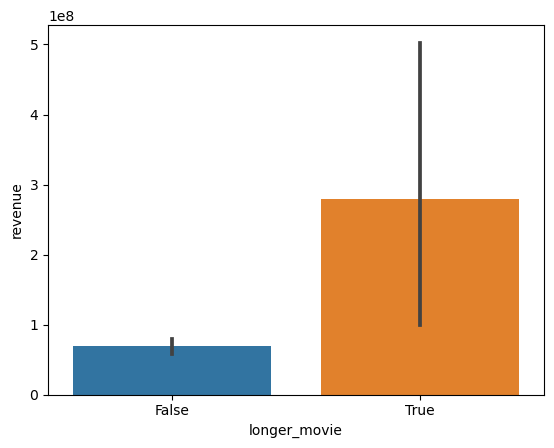

In [24]:
## visualize the group means
sns.barplot(data=plot_df, x='longer_movie', y='revenue')

In [25]:
## Saving JUST the numeric col as final group variables
longer_movie_group = longer_movie_df['revenue']
shorter_movie_group = shorter_movie_df['revenue']
longer_movie_group

156    465361176.0
239    215294342.0
587      4900000.0
787     20908467.0
9      871368364.0
55       8100000.0
158    449220945.0
305    976475550.0
420     19000000.0
636     37317558.0
888      3786801.0
Name: revenue, dtype: float64

In [26]:
## Check smoker group for outliers
longer_movie_outliers = np.abs(stats.zscore(longer_movie_group)) > 3

## how many outliers?
longer_movie_outliers.sum()

0

In [27]:
## Check smoker group for outliers
shorter_movie_outliers = np.abs(stats.zscore(shorter_movie_group)) > 3

## how many outliers?
shorter_movie_outliers.sum()

7

In [28]:
## remove outliers from female_group
shorter_movie_group = shorter_movie_group.loc[~shorter_movie_outliers]
shorter_movie_group

4        12854953.0
11          14904.0
13      224834564.0
16         105983.0
18      296339527.0
           ...     
905        318451.0
917      28023563.0
949      10229331.0
992       4035192.0
1139       482902.0
Name: revenue, Length: 330, dtype: float64

In [36]:
result = stats.normaltest(longer_movie_group)
print(result.pvalue)
result.pvalue < .05

0.22408073632375955


False

In [33]:
len(longer_movie_group)

11

In [32]:
result = stats.normaltest(shorter_movie_group)
result.pvalue < .05

True

In [35]:
len(shorter_movie_group)

330

- We fail to reject the null hypothesis that there is no statistical difference between the longer_movie_group and a normal distribution. 
- We reject the null hypothesis and conclude that there is a statistical difference between the shorter_movie_group and a normal distribution.

In [37]:
## Use Levene's test for equal variance
result = stats.levene(longer_movie_group, shorter_movie_group)
print(result)

LeveneResult(statistic=60.828139543894245, pvalue=7.760485035980041e-14)


In [38]:
## Use an if-else to help interpret the p-value
if result.pvalue < 0.5:
    print(f'The groups do NOT have equal variance.')
else:
    print(f'the groups DO have equal variance.')

The groups do NOT have equal variance.


In [39]:
## run final hypothess test
result = stats.ttest_ind(longer_movie_group, shorter_movie_group, equal_var=False)
print(result)
result.pvalue < 0.05

Ttest_indResult(statistic=1.9945107996107927, pvalue=0.07397230836203926)


False

- We fail to reject the null hypothesis that there is no significant difference between revenue and the length of a movie.